In [37]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

Your Name and PRN:

* Name : ______Satakshi Gupta______
* PRN : ____250840128027____
* Date : _______12/11/2025_______

# Deep Neural Networks
## Assignment 02


## Take Single Layer Model and add Sigmoid activation function

## Import Statements

In [38]:
###-----------------
### Import libraries
###-----------------
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             f1_score)  # Import function to calculate various metric

In [39]:
###------------------
### Global Parameters
###------------------

# # Directories
# #inpDir = '../../input'
# inpDir = Path('..') / '..' / 'input'
# # outDir = '../output'
# outDir = Path('..') / 'output'


RANDOM_STATE = 25
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rng=np.random.default_rng(seed=RANDOM_STATE)
TEST_SIZE  = 0.2 # Size of test data

# Parameters for plotting
NOISE=0.2
EPOCHS=201
ALPHA=0.1
N_SAMPLE=1000

params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [40]:
def fn_plot_decision_boundary(X: np.ndarray, wts: np.ndarray, pred_func):
    """
    Plots the decision boundary for a classification model along with the data points.
    
    Args:
        X (np.ndarray): Input feature matrix with shape (n_samples, 3)
        wts (np.ndarray): Weights matrix
        pred_function: Function to predict using weights and datapoints
    """
    
    # Initialize the figure with specified dimensions
    fig, ax = plt.subplots( figsize=(8, 5) )
    
    # Small increment value to create a fine grid for smooth decision boundary
    dm = 0.05
    padding = 2 * dm
    
    # Calculate the range for x-axis (first feature) with padding
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    
    # Calculate the range for y-axis (second feature) with padding  
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    
    # Create a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # Flatten the mesh grid arrays and stack them column-wise to create coordinate pairs
    XX = np.c_[xx.ravel(), yy.ravel()] # Resulting shape: (n_points, 2)

    # Add a column of ones to the coordinate array for the bias term
    XX = np.hstack((XX, np.ones((XX.shape[0], 1)))) # make array compatible 
    
    # List to collect predictions for each point in the mesh grid
    y_pred = []
    
    # Iterate over each coordinate point in the mesh grid
    for row in XX:
        # Make prediction for the current coordinate using global 'weights' and 'predict' function
        y_p = pred_func(row, wts)
        y_pred.append(y_p)
        
    # Reshape predictions to match the original mesh grid dimensions
    Z = np.array(y_pred).reshape(xx.shape)

    # Create filled contour plot showing the decision regions
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    
    # Scatter plot of the actual data points, colored by their true class labels
    ax.scatter(X[:, 0], X[:, 1], c=X[:, 2], s=20, edgecolor='k', cmap=plt.cm.bwr)
    
    # Set plot title and axis labels
    ax.set_title('Decision Boundary')
    ax.set_xlabel('A')  
    ax.set_ylabel('B') 
    
    # Display the final plot
    plt.show()

In [41]:
X,y=make_moons(n_samples=N_SAMPLE,noise=NOISE,random_state=RANDOM_STATE,shuffle=True)
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [42]:
X[:5],y[:5]

(array([[ 0.66377869, -0.39577383],
        [ 0.75869937,  0.5647908 ],
        [ 0.0048568 ,  0.93494487],
        [ 0.91012079, -0.35352146],
        [ 1.00906662, -0.6147855 ]]),
 array([1, 0, 0, 1, 1]))

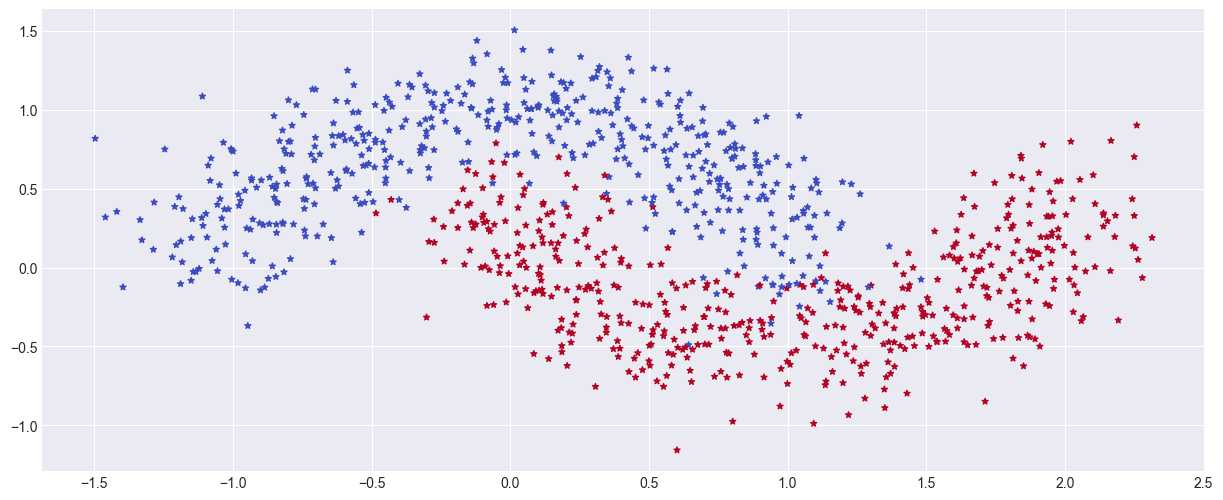

In [43]:
plt.scatter(X[:,0],X[:,1],s=20,c=y,marker='*',cmap=CMAP)

In [44]:
data_df=pd.DataFrame(X,columns=['A','B'])
data_df['target']=y
data_df.head()

,A,B,target
0,0.663779,-0.395774,1
1,0.758699,0.564791,0
2,0.004857,0.934945,0
3,0.910121,-0.353521,1
4,1.009067,-0.614785,1


In [45]:
data_train,data_test=data_df.to_numpy()[:900],data_df.to_numpy()[900:]
data_train.shape,data_test.shape

((900, 3), (100, 3))

In [46]:
def fn_sigmoid(z: np.ndarray)->float:
    return 1/(1+np.exp(-z))

In [47]:
sm=fn_sigmoid(np.asarray([-np.inf,-1,0,1.0, np.inf]))
sm

array([0.        , 0.26894142, 0.5       , 0.73105858, 1.        ])

In [48]:
def predict(row,weights):
    z=weights[0]
    for i in range (len(row)-1):
        z+=weights[i+1]*row[i]
    return fn_sigmoid(z)

In [49]:
weights=np.array([0.1,2.0,1.0]) #eXAMPLE WEIGHTS: Bias, weight1, weight2
predict(data_df.loc[0].to_numpy(),weights)

np.float64(0.7372615291252758)

In [50]:
def train_weights(train,alpha,n_epochs):
    error=[]#to track error
    weights=rng.random(train.shape[1])#initialize weights
    m=train.shape[0]#How may rows
    for epoch in range(n_epochs):#looping for Num epochs
        sum_error=0#to collect error for this
        for row in train:
            prediction=predict(row,weights)
            dz=prediction-row[-1]#(a-y)
            sum_error+=(prediction-row[-1])**2
            weights[0]=weights[0]-alpha*dz
            for i in range (len(row)-1):
                weights[i+1]=weights[i+1]-alpha*dz*row[i]
        error.append(sum_error/m)#Average Error
    return error,weights


In [51]:
error,weights=train_weights(train=data_train,alpha=ALPHA,n_epochs=EPOCHS)
weights

array([ 0.3602281 ,  1.32094057, -4.4619727 ])

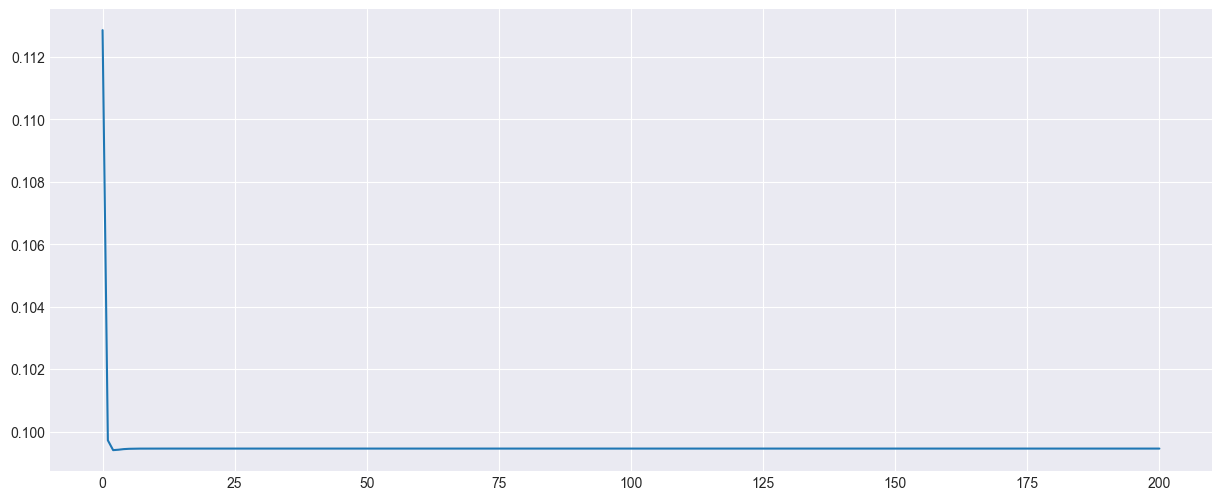

In [52]:
fig,ax=plt.subplots()
ax.plot(error)

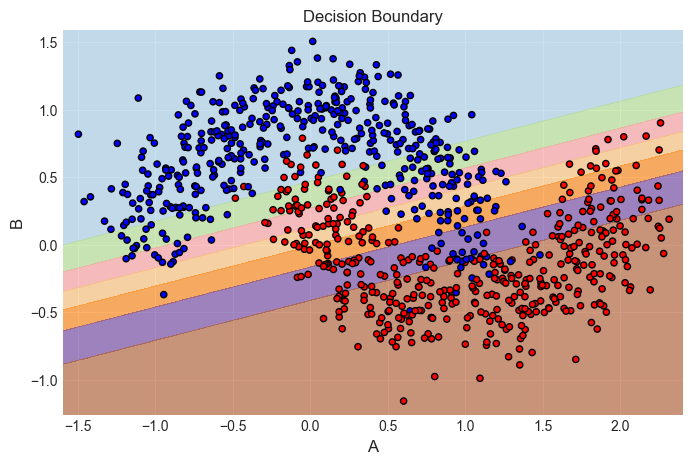

In [53]:
fn_plot_decision_boundary(data_train,weights,predict)

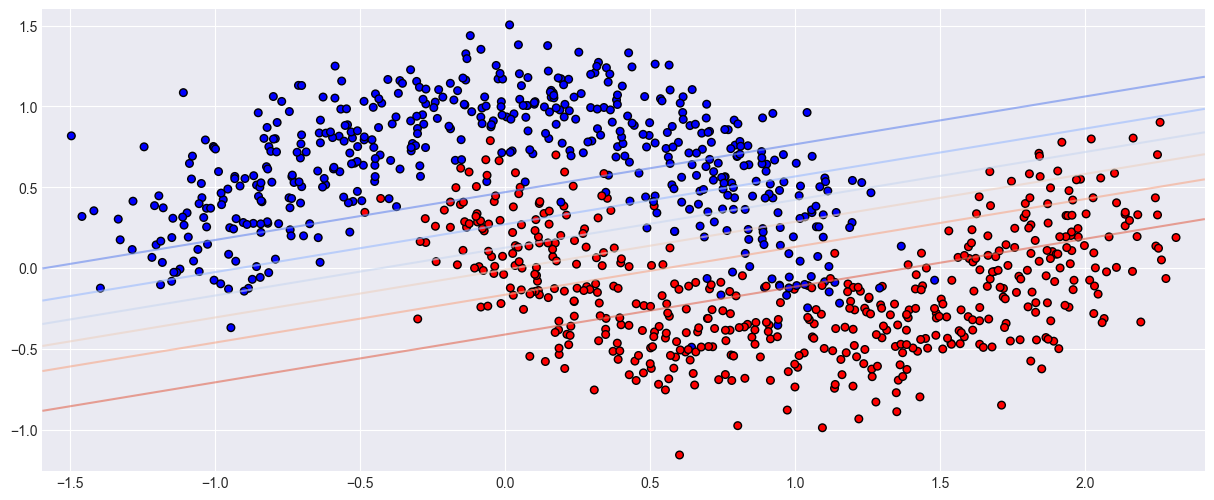

In [54]:
fig,ax=plt.subplots()
dm=0.01
margin=10*dm
x_max,x_min=X[:,0].max()+margin,X[:,0].min()-margin
y_max,y_min=X[:,1].max()+margin,X[:,1].min()-margin
xx,yy=np.meshgrid(np.arange(x_min,x_max,dm),np.arange(y_min,y_max,dm))
X_plot=np.c_[xx.ravel(), yy.ravel()] #Make 2D Data into 2 columns
X_plot=np.hstack((X_plot, np.ones((X_plot.shape[0],1))))        #stacking
y_pred=[]
for row in (X_plot):
    y_p=predict(row,weights)
    y_pred.append(y_p)
Z=np.array(y_pred).reshape(xx.shape)
ax.contour(xx,yy,Z,alpha=0.6,cmap=CMAP)
ax.scatter(X[:,0],X[:,1],c=y,s=30,edgecolors='k',cmap=plt.cm.bwr)